# Digit Recognizer Competition
- Author: Hasnain Yaqoob


# Importing Libraries

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [42]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

print(train_df.shape)  # (42000, 785)
print(test_df.shape)   # (28000, 784)

(42000, 785)
(28000, 784)


In [43]:
train_df.head()  # Display the first few rows of the training dataframe

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
test_df.head()   # Display the first few rows of the test dataframe

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


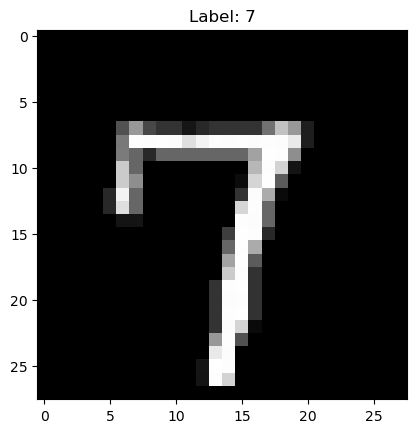

In [45]:
img = train_df.iloc[6, 1:].values.reshape(28, 28)
plt.imshow(img, cmap='gray')
plt.title(f"Label: {train_df.iloc[6, 0]}")
plt.show()


In [46]:
# Display the values of each pixel in the image 
print('Pixel values')
for row in img:
    for pixel in row:
        print('{:3}'.format(pixel), end=' ')
    print()

Pixel values
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0  82 152  71  51  51  21  41  51  51  51  51 113 193 152  30   0   0   0   0   0   0   0 
  0   0   0   0   0   0 122 253 252 253 252 223 243 253 252 253 252 253 252 233  30

# Normalizing the Data

In [48]:
# Separate features and labels
X_train = train_df.drop('label', axis=1)
y_train = train_df['label']

In [49]:
# Normalize the data
X_train = X_train / 255.0
test = test_df / 255.0

In [51]:
# Reshape the data for CNN input
X_train = X_train.values.reshape(-1, 28, 28, 1)  # Reshape for CNN input
test = test.values.reshape(-1, 28, 28, 1)  # Reshape for CNN input

In [55]:
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Building the Model

In [58]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Helps prevent overfitting
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

In [60]:
model.summary()  # Display the model summary

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_9 (Dense)             (None, 128)              

In [61]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [62]:
history = model.fit(X_train_split, y_train_split, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1050/1050 [==============================] - 146s 138ms/step - loss: 0.2697 - accuracy: 0.9178 - val_loss: 0.0695 - val_accuracy: 0.9764
Epoch 2/10
1050/1050 [==============================] - 145s 138ms/step - loss: 0.0940 - accuracy: 0.9718 - val_loss: 0.0512 - val_accuracy: 0.9846
Epoch 3/10
1050/1050 [==============================] - 149s 142ms/step - loss: 0.0704 - accuracy: 0.9795 - val_loss: 0.0397 - val_accuracy: 0.9887
Epoch 4/10
1050/1050 [==============================] - 148s 141ms/step - loss: 0.0551 - accuracy: 0.9834 - val_loss: 0.0463 - val_accuracy: 0.9864
Epoch 5/10
1050/1050 [==============================] - 142s 135ms/step - loss: 0.0443 - accuracy: 0.9856 - val_loss: 0.0435 - val_accuracy: 0.9876
Epoch 6/10
1050/1050 [==============================] - 136s 130ms/step - loss: 0.0402 - accuracy: 0.9874 - val_loss: 0.0400 - val_accuracy: 0.9893
Epoch 7/10
1050/1050 [==============================] - 138s 131ms/step - loss: 0.0341 - accuracy: 0.9896 - val_

In [63]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

263/263 [==============================] - 15s 57ms/step - loss: 0.0406 - accuracy: 0.9905
Validation Loss: 0.04057764634490013, Validation Accuracy: 0.9904761910438538


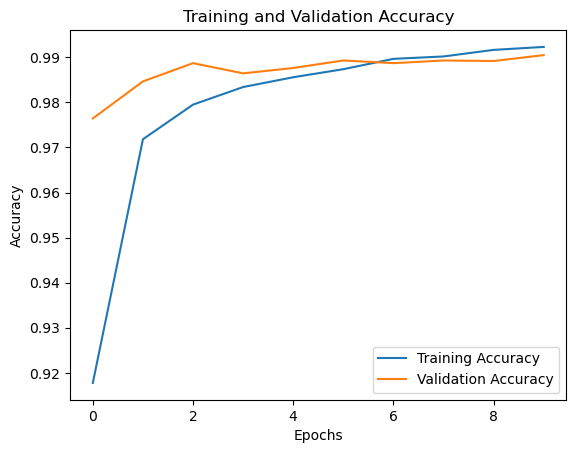

In [64]:
# plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Predicting on Test Data

In [65]:
predictions = model.predict(test)
predicted_labels = np.argmax(predictions, axis=1)

875/875 [==============================] - 48s 54ms/step


# Submission File

In [66]:
submission = pd.DataFrame({
    'ImageId': range(1, len(predicted_labels)+1),
    'Label': predicted_labels
})
submission.to_csv('submission.csv', index=False)